In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.express as px

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
warnings.filterwarnings('ignore')

In [5]:
testdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanicD/test.csv')
traindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanicD/train.csv')
submissiondf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanicD/gender_submission.csv')

In [6]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanicD/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanicD/train.csv')

In [7]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
testdf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
traindf.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
PassengerId = traindf['PassengerId']

traindf['TicketType'] = traindf['Ticket'].apply(lambda x: x[0:3])
traindf['TicketType'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: TicketType
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [12]:
traindf['TicketType'] = traindf['TicketType'].astype('category')

In [13]:
traindf['TicketType'] = traindf['TicketType'].cat.codes

In [14]:
testdf['TicketType'] = testdf['Ticket'].apply(lambda x: x[0:3])
testdf['TicketType'] = testdf['TicketType'].astype('category')
testdf['TicketType'] = testdf['TicketType'].cat.codes

In [15]:
y_train = traindf['Survived']

In [16]:
traindf.drop(['Survived'], axis=1, inplace=True)

In [17]:
x_train = traindf.values
x_test = testdf.values

#### Age

In [18]:
data = [traindf, testdf]

for ds in data:
  mean = traindf['Age'].mean()
  std = testdf['Age'].std()
  nullc = ds['Age'].isnull().sum()

  rand_age = np.random.randint(mean-std, mean+std, size=nullc)

  age_slice = ds['Age'].copy()
  age_slice[np.isnan(age_slice)] = rand_age
  ds['Age'] = age_slice.astype(int)

Text(0.5, 1.0, 'Male')

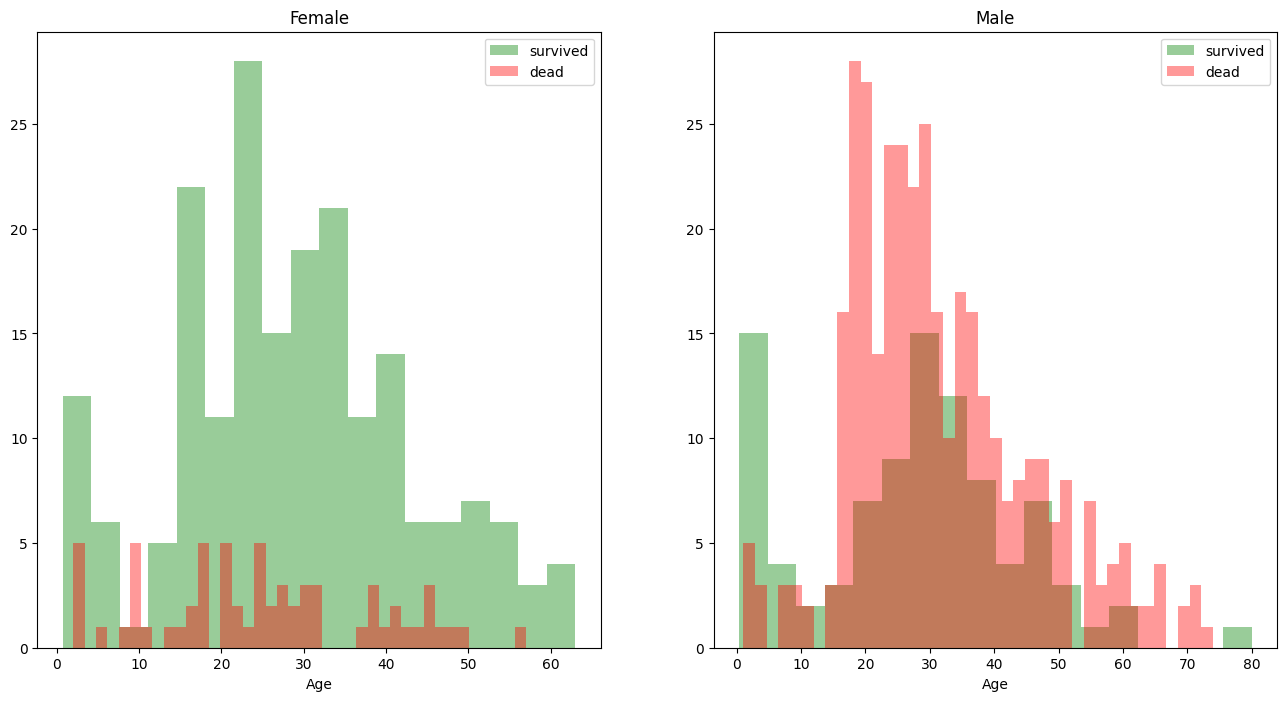

In [19]:
survived = 'survived'
not_survived = 'dead'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

women = train[train['Sex'] == 'female']
men = train[train['Sex'] == 'male']

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins=18, label = survived, color = 'green', ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins=40, label = not_survived, color='red', ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label = survived, color='green', ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins=40, label = not_survived, color = 'red', ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')


In [20]:
fig = px.scatter_3d(train, x='PassengerId', y='Sex', z='Age', color='Survived')
fig.show()

In [21]:
px.scatter(train, x='PassengerId', y='Age', color='Survived', template='plotly', log_x=True, size_max=20, title='Survival w.r.t. Age')

<Axes: xlabel='Pclass', ylabel='Survived'>

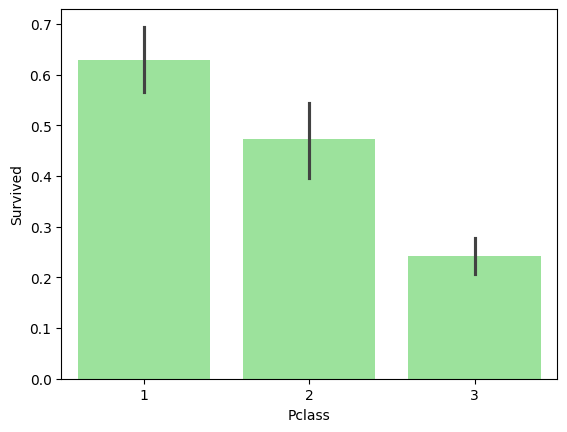

In [27]:
sns.barplot(x='Pclass', y='Survived', data=train, color='lightgreen')

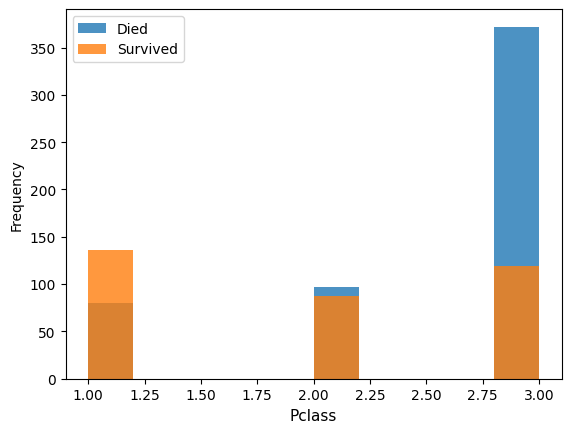

In [30]:
train.groupby('Survived')['Pclass'].plot.hist(histtype='bar', alpha=0.8)
plt.legend(('Died', 'Survived'), fontsize=10)
plt.xlabel('Pclass', fontsize=11)
plt.show()

In [31]:
traindf['Embarked'].fillna(traindf['Embarked'].mode, inplace=True)
testdf['Embarked'].fillna(testdf['Embarked'].mode, inplace=True)


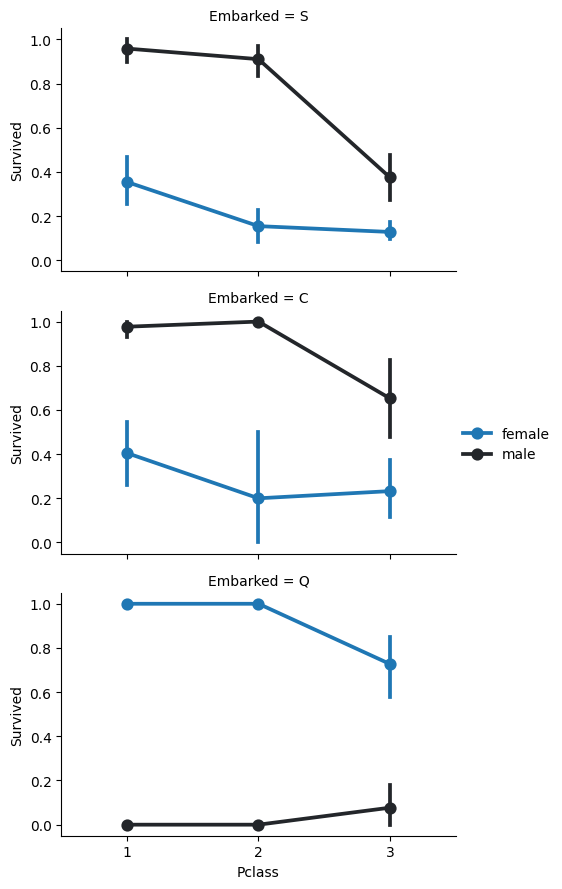

In [34]:
facet = sns.FacetGrid(train, row='Embarked', aspect=1.6)
facet.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None)
facet.add_legend()

<Axes: xlabel='Survived', ylabel='count'>

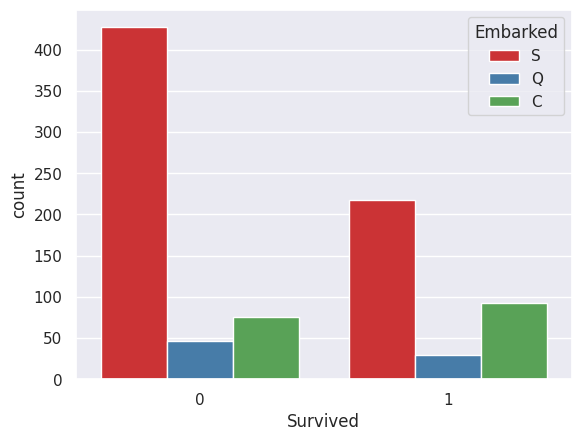

In [36]:
sns.set(style='darkgrid')
sns.countplot(data=train, x='Survived', hue='Embarked', palette='Set1')

In [39]:
# data = [test, train]
# for ds in data:
#   ds['relatives'] = ds['SibSp'] + ds['Parch']
#   ds.loc[ds['relatives']>0, 'travelled_alone'] = 'No'
#   ds.loc[ds['relatives'] == 0, 'travelled_alone'] = 'Yes'
# axes = sns.factorplot('relatives', 'Survived', data=train, aspect=2.5)

AttributeError: module 'seaborn' has no attribute 'factorplot'

In [41]:
px.histogram(train, x='SibSp', y='Parch', color='Sex', marginal='rug',hover_data=train.columns).show()

In [42]:
fig = px.scatter(train, x="PassengerId", y="Survived", color="Survived", log_x=True, size_max=20, template='plotly_dark', title="Survived or Died?")
fig.show()

In [59]:
param_test1 = {
    'n_estimators': [50,100,200,500,750,1000],
    'max_depth': [3,5,7,9, 10, 20, 30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False]
}

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

classifier = RandomForestClassifier()
features = ["Pclass", "Sex", "SibSp", "Parch"]
x = pd.get_dummies(traindf[features])

rscv = RandomizedSearchCV(classifier, param_test1, cv=10, verbose=True, scoring='accuracy', n_jobs=-1, return_train_score=True)

In [67]:
x_test = pd.get_dummies(testdf[features])


In [61]:
rscv.fit(x, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 7, 9, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500, 750,
                                                         1000]},
                   return_train_score=True, scoring='accuracy', verbose=True)

In [63]:
rscv.best_score_


0.8047066167290886

In [64]:
rscv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 3,
 'bootstrap': False}

In [68]:
pred = rscv.predict(x_test)

In [70]:
op = pd.DataFrame({'PassengerId':testdf.PassengerId, 'Survived':pred})
op.to_csv('/content/drive/MyDrive/Colab Notebooks/submission_titanic.csv',index=False)

In [71]:
randomc = RandomForestClassifier(n_estimators=100, random_state=2, max_depth=3)
randomc.fit(x, y_train)

RandomForestClassifier(max_depth=3, random_state=2)

In [72]:
pred2 = randomc.predict(x_test)

In [73]:
op2 = pd.DataFrame({'PassengerId':testdf.PassengerId, 'Survived':pred2})
op2.to_csv('/content/drive/MyDrive/Colab Notebooks/submission_titanic2.csv',index=False)